# 개요  
1. 시계열 데이터가 무엇인가?
2. Datetime 객체를 이용해 시간을 표현하고, 필터링하는 방법
3. 시계열 시각화  

기온, 미세먼지 농도, 주식 가격들이 시간에 따라서 바뀌게 되는 데이터이다. 이것을 시계열 데이터라고 합니다.  

특히 인덱스로 활용할 수 있을 때 폭발적인 역량을 발휘하게 됩니다. 어떻게 판다스가 시계열 데이터를 다룰수있을지 알아보자!

# 1. 파이썬과 pandas 날짜 도구들  
기본적인 사항들을 먼저 짚어보겠습니다.  
- 파이썬에서 시간과 날짜를 다루는 기본 형식은 **datatime** 모듈의 date,time,datetime입니다.
- date는 연/월/일, time은 시/분/초/마이크로초, datetime=date+time으로 구성됩니다.  
- pandas에서는 **Timestamp**라고 하는 data type이 있으며, 이는 numpy의 datetime64에서 파생되었습니다.  
- pandas와 파이썬에서는 날짜 차이를 계산하기 위해 **timedelta** 객체가 있습니다.

date는 연월일이기때문에 일종의 construct가 되어서 넘겨주게된다.  
time은 시간 분 마이크로초라고해서 time이라는 객체를 만들었다.

In [5]:
import pandas as pd
import numpy as np
import datetime
date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30, second=19, microsecond=418237)
dt = datetime.datetime(year=2013, month=6, day=7, hour=12, minute=30, second=19,microsecond=758234)

In [6]:
print(f'this is date:{date}\nthis is time:{time}\nthis is dt:{dt}')


this is date:2013-06-07
this is time:12:30:19.418237
this is dt:2013-06-07 12:30:19.758234


In [7]:
#이번엔 timedelta 입니다. 
#말 그대로 시간의 변화를 td로 볼수있다.
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, seconds=6.73,
 milliseconds=99, microseconds=8)
td

datetime.timedelta(days=19, seconds=37206, microseconds=829008)

In [8]:
#td 를 만드는 이유는 시간 계산을 하기 위함입니다.
print(f'td + date = {td + date}')
print(f'td + dt = {td + dt}')
#첫번째 date에서는 시간의 정보가 없으니 사라집니다. 

td + date = 2013-06-26
td + dt = 2013-06-26 22:50:26.587242


In [9]:
#td + time 은 애러가 납니다.
td + time

TypeError: unsupported operand type(s) for +: 'datetime.timedelta' and 'datetime.time'

In [10]:
# 이제는 pandas 로 넘어와서, Timestamp 를 사용해봅시다.
# python 의 datetime 과 유사하지만, 조금 더 정밀하고 유연합니다.
pd.Timestamp(year=2012, month=12, day=21, hour=5,
 minute=10, second=8, microsecond=99)


Timestamp('2012-12-21 05:10:08.000099')

In [11]:
pd.Timestamp('2016-1-10')


Timestamp('2016-01-10 00:00:00')

In [12]:

#형식이 섞여 있어도 이렇게!
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [13]:
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [14]:
pd.Timestamp('2016-01-06T05:34:43.123785')
#정말 정교해야할땐 모든시간을 쓸 수 있다.

Timestamp('2016-01-06 05:34:43.123785')

In [15]:
#정수를 Timestamp에 넘기게 되면, 유닉스 시간에 따라 경과된 나노초에 해당하는 날짜를 알려줍니다.
#그러니까, 1970년 1월 1일 + n 나노초 가 되는 것이죠.
pd.Timestamp(500)
#유닉스 기준은 1970년 1월 1일 기준으로 나노초가 된다. 

Timestamp('1970-01-01 00:00:00.000000500')

In [16]:
pd.Timestamp(5001, unit='D') # unit을 표기해줘 day라는 것을 알려줍니다.
#D로 하면 Dat로 하게해줘 5000일이면 83년 9월 11이 된다.

Timestamp('1983-09-11 00:00:00')

In [17]:
#pandas 에서 to_datetime 이란 메서드는 Timestamp 와 하는 일이 매우 유사합니다.
#하지만 조금의 유연성을 더 가지고 있어요.
pd.to_datetime('2015-5-13')
#String을 받아서 날짜혈태로 바꾸어줍니다.

Timestamp('2015-05-13 00:00:00')

In [18]:
pd.to_datetime('2015-13-5', dayfirst=True)
#서양은 반대로 일 월 연 바꿀 수 있다 그래서 false라고 하면된다. 
#dayfirst는 없애면안된다 !

Timestamp('2015-05-13 00:00:00')

In [19]:
pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm',
 format='Start Date: %b %d, %Y Start Time: %I:%M %p')

Timestamp('2017-09-30 13:30:00')

In [20]:
pd.to_datetime(100, unit='D', origin='2013-01-01')
#2013년 1월1일 부터 100일이 지난것!

Timestamp('2013-04-11 00:00:00')

In [21]:
#시리즈에서 통쨰로 datetime을 바꾸고 싶을때.
# to_datetime 을 활용하면 시리즈나 df 에서도 쉽게 날짜 형태를 만들 수 있습니다.
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')
#이렇게 10일 100일 1000일 지난후를 쉽게 볼 수 있다.

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [22]:
#이건 미국식 날짜이네요.
s = pd.Series(['12-5-2015', '14-1-2013', '20/12/2017', '40/23/2017'])#마지막 날짜 주목!
pd.to_datetime(s, dayfirst=True, errors='coerce') #coerce 안 쓰면 애러가 나요


0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [23]:
#pandas 에서도 timedelta 관련 함수들이 있습니다.
#역시 pd.Timedelta 와 pd.to_timedelta 가 있고, 후자가 조금 더 유연성을 가집니다.
pd.Timedelta('12 days 5 hours 3 minutes 123545 nanoseconds')


Timedelta('12 days 05:03:00.000123545')

In [24]:
pd.Timedelta(days=5, minutes=7.42)

Timedelta('5 days 00:07:25.200000')

In [25]:
pd.Timedelta(100, unit='W') #unit 이 week
#W를 쓰면 Week이 된다. 그래서 100주가 timedelta가 된다.

Timedelta('700 days 00:00:00')

In [26]:
pd.to_timedelta('56:15:45.349') # 시:분:초로 timedelta를 표현했다.

Timedelta('2 days 08:15:45.349000')

In [27]:
s = pd.Series([10, 100])
pd.to_timedelta(s, unit='s')

0   0 days 00:00:10
1   0 days 00:01:40
dtype: timedelta64[ns]

In [28]:
time_str = ['2 days 24 minutes 89.53 seconds', '00:45:23.6']
pd.to_timedelta(time_str)

TimedeltaIndex(['2 days 00:25:29.530000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

In [29]:
#timedelta 끼리는 연산도 가능합니다.
pd.Timedelta('12 days 5 hours 3 minutes')*2
#연산도 가능하죠 ! 2를 곱했습니다.

Timedelta('24 days 10:06:00')

In [30]:

(
 pd.Timestamp('1/1/2017') +
 pd.Timedelta('12 days 5 hours 3 minutes')*2
)
#연산도 가능한것을 보여줍니다.

Timestamp('2017-01-25 10:06:00')

In [31]:
#세시간 10초 5시간 100초,
pd.to_timedelta([10, 100], unit='s') + pd.to_timedelta(['3 hours', '5 hours'])

TimedeltaIndex(['0 days 03:00:10', '0 days 05:01:40'], dtype='timedelta64[ns]', freq=None)

In [32]:
#심지어는 나눗셈도 가능합니다.
pd.Timedelta('12 days') / pd.Timedelta('3 days')
#이거는 4번의 사이클을 돌겠구나,  
#타임델타로 나눗셈을 할때에는 윈도우라고하는 일정 시간을 잡을때, 사이클을 잡을 때 중요하다.
#그 때 timedelta의 나눗셈이 중요하다.

4.0

In [33]:
# timestamp 와 timedelta는 많은 메서드들을 가지고 있습니다.
# 예를 들어..
ts = pd.Timestamp('2016-10-1 4:23:23.4')
ts.ceil('h')

Timestamp('2016-10-01 05:00:00')

In [34]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second
#특정한 객체를 추출하고 싶을때에는 이런식으로 attribute를 꺼낼 수 있다.

(2016, 10, 1, 4, 23, 23)

In [35]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth
#이 해의 몇번째 날인지, 2016년 10월 1일은 2016년의 275번째 날이다. 
#10월은 31일까지 있으니까.

(5, 275, 31)

In [36]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 400000)

In [37]:
td = pd.Timedelta(123.456, unit='h')
td

Timedelta('5 days 03:27:21.600000')

In [38]:
td.round('min')
#이제 올림이 아니라 반올림입니다.  그래서 21초니까 30보다 아래이므로 다 날라갑니다.

Timedelta('5 days 03:27:00')

In [39]:
td.components


Components(days=5, hours=3, minutes=27, seconds=21, milliseconds=600, microseconds=0, nanoseconds=0)

In [40]:
td.total_seconds()


444441.6

# 2. 시계열을 이용한 슬라이스

날짜를 이용해서 데이터를 나누는 법을 배워봅시다.

In [41]:
crime = pd.read_hdf('data/crime.h5', 'crime')
#큰데이터를 한번에 저장할 수 있는 데이터 형식입니다.
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [42]:
#tables 가 필요하다고 하니 설치합시다.
!pip install tables


In [43]:

crime = pd.read_hdf('data/crime.h5', 'crime')
crime.dtypes
#데이터 타입을 보존하면서 저장한다.

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [44]:
#csv와 달리 h5는 데이터의 형태를 기억합니다.
# dtypes 가 다양하게 있고, category 3개, 날짜 1개가 있네요.
# date 를 인덱스로 만든 뒤 여러 가지를 해봅시다.
crime = crime.set_index('REPORTED_DATE')
crime


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...
2017-09-13 05:48:00,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [45]:

#날짜가 index이니 loc을 활용해봅시다.
crime.loc['2016-05-12 16:45:00']


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [46]:
#시간을 제외하고 선택할 수도 있습니다.
crime.loc['2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...
2016-05-12 17:55:00,public-peace-other,public-disorder,-105.027747,39.700029,westwood,1,0
2016-05-12 19:24:00,threats-to-injure,public-disorder,-104.947118,39.763777,clayton,1,0
2016-05-12 22:28:00,sex-aslt-rape,sexual-assault,NaN,NaN,harvey-park-south,1,0


In [47]:
#아니면 연/월 도 선택할 수 있죠
crime.loc['2016-05'].sort_index()
#sort를 해서 보죠.

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-01 00:03:00,theft-other,larceny,-104.948370,39.740322,city-park,1,0
2016-05-01 00:09:00,criminal-mischief-other,public-disorder,-104.963126,39.738641,cheesman-park,1,0
2016-05-01 00:09:00,threats-to-injure,public-disorder,-104.963126,39.738641,cheesman-park,1,0
2016-05-01 00:09:00,disturbing-the-peace,public-disorder,-104.963126,39.738641,cheesman-park,1,0
2016-05-01 00:27:00,vehicular-eluding-no-chase,all-other-crimes,-105.022877,39.692959,ruby-hill,1,0
...,...,...,...,...,...,...,...
2016-05-31 23:31:00,traf-habitual-offender,all-other-crimes,-104.903518,39.683885,indian-creek,1,0
2016-05-31 23:31:00,public-order-crimes-other,all-other-crimes,-104.903518,39.683885,indian-creek,1,0
2016-05-31 23:34:00,burglary-residence-no-force,burglary,-104.886163,39.741763,east-colfax,1,0


In [48]:
#2016년에 일어난 일들을 모두 알 수 있습니다.
crime.loc['2016']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-01-13 15:26:00,drug-hallucinogen-sell,drug-alcohol,-104.998843,39.741401,cbd,1,0
2016-03-28 14:01:00,theft-shoplift,larceny,-104.847803,39.783106,montbello,1,0
2016-03-06 04:32:00,traffic-accident-hit-and-run,traffic-accident,-104.983499,39.740860,north-capitol-hill,0,1
2016-02-04 14:42:00,traffic-accident,traffic-accident,-104.966860,39.780128,elyria-swansea,0,1
2016-03-02 17:15:00,criminal-mischief-mtr-veh,public-disorder,-104.841596,39.781756,montbello,1,0
...,...,...,...,...,...,...,...
2016-03-22 15:01:00,fraud-identity-theft,white-collar-crime,-105.007622,39.746067,auraria,1,0
2016-08-10 14:00:00,fraud-identity-theft,white-collar-crime,-105.005238,39.740155,lincoln-park,1,0
2016-01-28 13:47:00,violation-of-restraining-order,all-other-crimes,-104.994883,39.730313,lincoln-park,1,0


In [49]:
crime.loc['2016-05-12 03'] #매우 요긴하죠?
# 이렇게 하면 세시부터 세시 59분까지 일어난 일들을 알 수 있습니다.

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 03:11:00,theft-shoplift,larceny,-105.020586,39.678224,college-view-south-platte,1,0
2016-05-12 03:43:00,traf-other,all-other-crimes,-104.892862,39.740153,east-colfax,1,0
2016-05-12 03:18:00,criminal-trespassing,all-other-crimes,-104.990480,39.728076,lincoln-park,1,0
2016-05-12 03:13:00,assault-simple,other-crimes-against-persons,-104.977202,39.739745,capitol-hill,1,0


In [50]:
#월 이름으로도 불러올 수 있습니다.
crime.loc['Dec 2015'].sort_index()
#2025년 12월만 알 수 있습니다.

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:35:00,drug-cocaine-possess,drug-alcohol,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,traffic-accident,traffic-accident,-104.945076,39.736768,congress-park,0,1
2015-12-31 23:44:00,drug-cocaine-possess,drug-alcohol,-104.966814,39.746460,city-park-west,1,0


In [51]:
crime.loc['2016 Jan, 4'].sort_index()


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-01-04 00:14:00,traf-other,all-other-crimes,-105.026024,39.754763,sloan-lake,1,0
2016-01-04 00:21:00,traffic-accident,traffic-accident,-105.048674,39.700410,westwood,0,1
2016-01-04 00:47:00,vehicular-eluding-no-chase,all-other-crimes,-104.895252,39.740157,east-colfax,1,0
2016-01-04 00:54:00,forgery-poss-of-forged-inst,white-collar-crime,-105.056656,39.784739,regis,1,0
2016-01-04 01:08:00,disturbing-the-peace,public-disorder,-104.960140,39.736670,cheesman-park,1,0
...,...,...,...,...,...,...,...
2016-01-04 23:12:00,traffic-accident-hit-and-run,traffic-accident,-104.925667,39.667484,university-hills,0,1
2016-01-04 23:14:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.907417,39.653467,hampden,1,0
2016-01-04 23:20:00,traffic-accident,traffic-accident,-104.674048,39.851926,dia,0,1


In [52]:
#슬라이싱을 이용하면 특정 범위의 날짜를 선택할 수 있습니다.
crime.sort_index().loc['2015-3-4':'2016-1-1']
#sort_index()를 안넣어주면 warning이 뜹니다.

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,-104.996861,39.738612,civic-center,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,-105.025088,39.707590,westwood,0,1
2016-01-01 23:40:00,robbery-business,robbery,-105.039236,39.726157,villa-park,1,0


In [53]:
crime.sort_index().loc['2015-3-4 22':'2016-1-1 11:22:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,-104.906412,39.632816,hampden-south,0,1
2015-03-04 22:32:00,traffic-accident-hit-and-run,traffic-accident,-104.979180,39.706613,washington-park-west,0,1
2015-03-04 22:33:00,traffic-accident-hit-and-run,traffic-accident,-104.991655,39.740067,civic-center,0,1
2015-03-04 22:36:00,theft-unauth-use-of-ftd,white-collar-crime,-105.045235,39.667928,harvey-park,1,0
...,...,...,...,...,...,...,...
2016-01-01 11:10:00,theft-of-motor-vehicle,auto-theft,-104.819450,39.791615,montbello,1,0
2016-01-01 11:11:00,traffic-accident,traffic-accident,-104.981701,39.736814,capitol-hill,0,1
2016-01-01 11:11:00,traffic-accident-hit-and-run,traffic-accident,-104.973731,39.714223,speer,0,1


In [54]:
#위의 작업이 가능한 이유는 현재 index가 DatetimeIndex이기 때문입니다. 확인해볼까요?
crime.index

DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00',
               '2014-06-29 02:00:00', '2014-06-29 02:18:00',
               '2014-06-29 04:17:00', '2014-06-29 04:22:00',
               '2014-06-29 02:56:00', '2014-06-29 04:54:00',
               '2014-01-20 08:29:00', '2014-06-29 03:56:00',
               ...
               '2017-09-12 13:40:00', '2017-09-12 18:13:00',
               '2017-09-13 01:12:00', '2017-09-12 15:33:00',
               '2017-09-12 14:00:00', '2017-09-13 05:48:00',
               '2017-09-12 20:37:00', '2017-09-12 16:32:00',
               '2017-09-12 13:04:00', '2017-09-12 09:30:00'],
              dtype='datetime64[ns]', name='REPORTED_DATE', length=460911, freq=None)

# 3. 인덱스가 아닌 상태에서 불리언 필터링

In [55]:
crime = pd.read_hdf('data/crime.h5', 'crime')
(
 crime[crime.REPORTED_DATE == '2016-05-12 16:45:00']
)
#true가 되는 데이터만 추출이 된다. 


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
300905,traffic-accident,traffic-accident,2016-05-12 16:45:00,-104.847024,39.779596,montbello,0,1
302354,traffic-accident,traffic-accident,2016-05-12 16:45:00,-105.049180,39.769296,west-highland,0,1
302373,fraud-identity-theft,white-collar-crime,2016-05-12 16:45:00,-104.931971,39.717359,hilltop,1,0


In [56]:
#이렇게 불러올 때, 날짜를 일부만 넣으면 아무 것도 나오지 않아요.
(
 crime[crime.REPORTED_DATE == '2016-05-12']
)


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC


In [57]:
#얘를 만족시키는 데이터가 1도 없다!
(crime.REPORTED_DATE == '2016-05-12').sum()

0

In [58]:
#between 을 사용해봅시다.
#특정한 범위안에 수가 있는지?
(
 crime[crime.REPORTED_DATE.between('2016-05-12', '2016-05-13')]
)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
295715,criminal-mischief-other,public-disorder,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0
296474,liquor-possession,drug-alcohol,2016-05-12 18:40:00,-104.995692,39.747875,cbd,1,0
297204,traffic-accident,traffic-accident,2016-05-12 22:26:00,-104.880037,39.777037,stapleton,0,1
299383,theft-bicycle,larceny,2016-05-12 20:35:00,-104.929350,39.763797,northeast-park-hill,1,0
299389,theft-of-motor-vehicle,auto-theft,2016-05-12 09:39:00,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...,...
358208,public-peace-other,public-disorder,2016-05-12 17:55:00,-105.027747,39.700029,westwood,1,0
358448,threats-to-injure,public-disorder,2016-05-12 19:24:00,-104.947118,39.763777,clayton,1,0
363134,sex-aslt-rape,sexual-assault,2016-05-12 22:28:00,NaN,NaN,harvey-park-south,1,0
365959,menacing-felony-w-weap,aggravated-assault,2016-05-12 15:59:00,-104.935172,39.723703,hilltop,1,0


In [61]:

#between 을 쓰면 년/월 기준으로도 자를 수 있습니다.
(
 crime[crime.REPORTED_DATE.between('2016-05', '2016-06')].sort_values('REPORTED_DATE')
)


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
289289,theft-other,larceny,2016-05-01 00:03:00,-104.948370,39.740322,city-park,1,0
283336,criminal-mischief-other,public-disorder,2016-05-01 00:09:00,-104.963126,39.738641,cheesman-park,1,0
283335,threats-to-injure,public-disorder,2016-05-01 00:09:00,-104.963126,39.738641,cheesman-park,1,0
289275,disturbing-the-peace,public-disorder,2016-05-01 00:09:00,-104.963126,39.738641,cheesman-park,1,0
165247,vehicular-eluding-no-chase,all-other-crimes,2016-05-01 00:27:00,-105.022877,39.692959,ruby-hill,1,0
...,...,...,...,...,...,...,...,...
316279,traf-habitual-offender,all-other-crimes,2016-05-31 23:31:00,-104.903518,39.683885,indian-creek,1,0
317825,public-order-crimes-other,all-other-crimes,2016-05-31 23:31:00,-104.903518,39.683885,indian-creek,1,0
311934,burglary-residence-no-force,burglary,2016-05-31 23:34:00,-104.886163,39.741763,east-colfax,1,0
314189,assault-dv,other-crimes-against-persons,2016-05-31 23:34:00,-104.886163,39.741763,east-colfax,1,0


In [62]:
(
 crime[crime.REPORTED_DATE.between('2016', '2017')].sort_values('REPORTED_DATE')
)
#2016년에 해당하는 정보만 가져옵니다.

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
375076,assault-simple,other-crimes-against-persons,2016-01-01 00:17:00,-105.044064,39.696096,mar-lee,1,0
283748,aggravated-assault,aggravated-assault,2016-01-01 00:25:00,-104.993574,39.739773,civic-center,1,0
272581,disturbing-the-peace,public-disorder,2016-01-01 00:30:00,-104.974995,39.767704,five-points,1,0
286739,traf-other,all-other-crimes,2016-01-01 00:33:00,-104.940621,39.751036,south-park-hill,1,0
284245,traffic-accident-hit-and-run,traffic-accident,2016-01-01 00:37:00,-104.986106,39.747526,north-capitol-hill,0,1
...,...,...,...,...,...,...,...,...
346842,traffic-accident-dui-duid,traffic-accident,2016-12-31 23:16:00,-105.025137,39.725426,barnum,0,1
367058,harassment-dv,public-disorder,2016-12-31 23:23:00,-104.978298,39.740637,north-capitol-hill,1,0
361186,drug-cocaine-possess,drug-alcohol,2016-12-31 23:27:00,-104.992172,39.714807,baker,1,0
359750,liquor-possession,drug-alcohol,2016-12-31 23:51:00,-104.989266,39.752146,five-points,1,0


In [63]:

#패턴을 사용한 매칭
(
 crime[crime.REPORTED_DATE.between('2016 Sep, 15', '2016 Sep, 16')]
)



,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
331184,liquor-possession,drug-alcohol,2016-09-15 22:40:00,-105.000542,39.739501,lincoln-park,1,0
331255,assault-dv,other-crimes-against-persons,2016-09-15 21:25:00,-105.016259,39.757616,highland,1,0
331427,criminal-mischief-mtr-veh,public-disorder,2016-09-15 10:30:00,-104.987565,39.700698,baker,1,0
333909,traffic-accident,traffic-accident,2016-09-15 18:21:00,-104.790479,39.774432,gateway-green-valley-ranch,0,1
333922,traffic-accident-hit-and-run,traffic-accident,2016-09-15 03:12:00,-105.032781,39.686004,mar-lee,0,1
...,...,...,...,...,...,...,...,...
361782,criminal-mischief-graffiti,public-disorder,2016-09-15 17:40:00,-104.974517,39.757904,five-points,1,0
369038,assault-simple,other-crimes-against-persons,2016-09-15 13:48:00,-104.994520,39.731349,lincoln-park,1,0
370257,aggravated-assault,aggravated-assault,2016-09-15 19:10:00,-105.018500,39.782887,sunnyside,1,0
373453,threats-to-injure,public-disorder,2016-09-15 10:34:00,-104.988854,39.723849,baker,1,0


In [65]:
#between 을 쓸 때 조심할 점은, 시간포함 여부입니다.
# 어떤 말인지 아래의 예를 볼까요?
#2016-05-13 을 넣었을 땐, 12일까지만
(
 crime[crime.REPORTED_DATE.between('2016-05-12', '2016-05-15')].sort_values('REPORTED_DATE')
)


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
310555,public-order-crimes-other,all-other-crimes,2016-05-12 00:05:00,-104.987417,39.727275,civic-center,1,0
315074,curfew,public-disorder,2016-05-12 00:07:00,-104.987432,39.726668,lincoln-park,1,0
312836,traf-other,all-other-crimes,2016-05-12 00:13:00,-105.053191,39.719419,barnum-west,1,0
310538,police-false-information,all-other-crimes,2016-05-12 00:33:00,-104.965948,39.764498,cole,1,0
311301,traf-habitual-offender,all-other-crimes,2016-05-12 01:01:00,-104.902327,39.771602,stapleton,1,0
...,...,...,...,...,...,...,...,...
314394,curfew,public-disorder,2016-05-14 23:19:00,-104.987485,39.739897,civic-center,1,0
312142,drug-cocaine-possess,drug-alcohol,2016-05-14 23:21:00,-105.025810,39.787361,regis,1,0
312897,drug-poss-paraphernalia,drug-alcohol,2016-05-14 23:22:00,-105.024375,39.686931,ruby-hill,1,0
313643,drug-poss-paraphernalia,drug-alcohol,2016-05-14 23:38:00,-104.988019,39.753420,five-points,1,0


In [69]:

#시간을 넣으면 해당 시간 전까지만. 그러니까 뒤에 들어오는 시간 전까지 들어가는 것이죠.
(
 crime[crime.REPORTED_DATE.between('2016-05-12', '2016-05-13 23:59:59')].sort_values
)
#이렇게 해야 13일 전체까지 들어간다.

<bound method DataFrame.sort_values of                  OFFENSE_TYPE_ID           OFFENSE_CATEGORY_ID  \
70165      aggravated-assault-dv            aggravated-assault   
295692   criminal-mischief-other               public-disorder   
295693  theft-items-from-vehicle      theft-from-motor-vehicle   
295694          traffic-accident              traffic-accident   
295696          traffic-accident              traffic-accident   
...                          ...                           ...   
368203     assault-police-simple  other-crimes-against-persons   
368204            assault-simple  other-crimes-against-persons   
368493         threats-to-injure               public-disorder   
371600                assault-dv  other-crimes-against-persons   
378711                assault-dv  other-crimes-against-persons   

             REPORTED_DATE     GEO_LON    GEO_LAT     NEIGHBORHOOD_ID  \
70165  2016-05-13 18:10:00 -104.845997  39.769993           stapleton   
295692 2016-05-13 15:5

In [70]:
#이 외에 DatetimeIndex에서만 가능한 여러 작업들을 확인해봅시다.
crime = pd.read_hdf('data/crime.h5', 'crime').set_index('REPORTED_DATE')

In [71]:
#날짜에 관계 없이 특정 시간을 선택
crime.between_time('2:00', '5:00', include_end=False)
#2시 5시 include_end, 5시 00분을 포함할 것인지? 날짜는 상관없는데 시간이 이 사이에 들어오는 걸 정리한다.


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [72]:
#모든 날짜에 대해 특정 시각 선택
crime.at_time('5:47')
#모든 날짜에 대해서 특정 시간만 추출한다. 

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,-104.986311,39.708426,washington-park-west,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037308,39.768336,west-highland,1,0


In [73]:
#데이터의 첫 6개월 선택
crime_sort = crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(6))
#그런데 7월이 껴있네요?
#판다스에서 기본적으로 정의해놓은 시간세기  :offset
#first : 가장 처음의 몇개를 선택하겠다. 
#1월 2일부터 6월 30일까지, 분명히 6개월인데 7월1일이 들어왔다?
#지금 6분 아래이기 떄문에 그렇다. 그래서 MonthEnd를 설정해주어야한다. 

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


In [74]:
# 또 다른 offset. 그런데 이번에는 6/30 04:00 까지만 나오네요?
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-29 23:01:00,aggravated-assault,aggravated-assault,-105.019673,39.733250,sun-valley,1,0
2012-06-29 23:11:00,traffic-accident,traffic-accident,-104.918451,39.653080,southmoor-park,0,1
2012-06-29 23:41:00,robbery-street,robbery,-104.991912,39.756163,five-points,1,0


In [75]:

#normalize를 추가하면, 시간 구성요소를 0으로 만들어서 정확하게 6개월을 잡습니다.
#이 부분은 나중에 여러분이 시계열을 다루게되면 찾아서 써보세요!
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))
#특정부분을 찾아야한다면 이것을 고려해야겠죠! ~~

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [76]:
crime_sort.loc[:'2012-06']
#log은 뒤에있는걸 포함하니 2012년 6월까지 가져온다. 


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [77]:
#pandas 에는 다양한 offset 들이 존재하고, 이를 잘 활용하면 편리하게 이용할 수 있습니다.
crime_sort.first('5D')
#5D는 첫시작한 날짜로부터 5일안에있는 데이터를 보여줍니다. 

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-06 23:11:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.999752,39.726081,lincoln-park,1,0
2012-01-06 23:23:00,violation-of-restraining-order,all-other-crimes,-104.969588,39.681135,university,1,0
2012-01-06 23:30:00,assault-dv,other-crimes-against-persons,-104.958983,39.674135,university-park,1,0


In [78]:
crime_sort.first('5B') #영업일 기준 5일
#비즈니스데이에요.출근하는날 기준! 주말을 빼고 ! 월화수목금,월화수목금!

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-08 23:46:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.991384,39.753888,five-points,1,0
2012-01-08 23:51:00,burglary-residence-no-force,burglary,-105.031781,39.747420,sloan-lake,1,0
2012-01-08 23:52:00,theft-other,larceny,-104.968227,39.739752,cheesman-park,1,0


In [79]:
crime_sort.first('7W') #7주
#첫 7주가 되겠습니다.

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-02-18 21:57:00,traffic-accident,traffic-accident,-104.974663,39.744041,north-capitol-hill,0,1
2012-02-18 22:19:00,criminal-mischief-graffiti,public-disorder,-104.957558,39.766129,clayton,1,0
2012-02-18 22:20:00,traffic-accident-dui-duid,traffic-accident,-104.919946,39.761917,north-park-hill,0,1


In [80]:
crime_sort.first('3QS') # 3분기 시작
#Q는 분기이기때문에 S는 분기의 Start. 따라서 3분기입니다. 

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-09-30 23:17:00,drug-hallucinogen-possess,drug-alcohol,-105.022715,39.678579,college-view-south-platte,1,0
2012-09-30 23:29:00,robbery-street,robbery,-104.977522,39.781310,globeville,1,0
2012-09-30 23:29:00,theft-of-motor-vehicle,auto-theft,-104.988838,39.686925,overland,1,0


In [81]:
crime_sort.first('A')
#A는 첫해. 


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-12-30 23:13:00,traffic-accident,traffic-accident,-104.973097,39.740032,capitol-hill,0,1
2012-12-30 23:14:00,burglary-residence-no-force,burglary,-104.960898,39.697153,washington-park,1,0
2012-12-30 23:39:00,theft-of-motor-vehicle,auto-theft,-105.002180,39.769714,sunnyside,1,0


In [82]:
#원하는 offset 이 없으면 만들 수 있습니다.
#내가 원하는 건너뛰는 차이를 만든다.
do = pd.DateOffset(years=2, months=5, days=3, hours=8, seconds=10)
pd.Timestamp('2021-1-30') + do


Timestamp('2023-07-03 08:00:10')

# 4. 주간 범죄 수 계산

자, 이제 본격적으로 분석에 Timestamp를 이용해봅시다.

In [86]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime').set_index('REPORTED_DATE').sort_index()

In [87]:
#resample 은 time series 를 groupby 하는 역할을 합니다.
#예를 들어 주별 범죄수를 구할 땐 다음과 같이 합니다.
#주의 마지막 날은 일요일이고, 이 날짜로 각 인덱스가 설정됩니다.
(
     crime_sort.resample('W').size()
)
#각 주별로 사이즈를 구할수있다. 얼마나 많은 범죄가있는지 알 수 있다.
#한주의 마지막을 기본적으로 일요일로 본다. 

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [88]:
# 첫 주의 범죄를 확인해봅시다.
len(crime_sort.loc[:'2012-1-8'])

877

In [89]:
#주의 마지막 요일을 바꿀 수 있습니다.
(
 crime_sort.resample('W-THU').size()
)
#기준이 되는 요일도 바꿀 수 있죠

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

In [90]:
#groupby 로 동일한 작업을 할 수 있습니다 (조금 더 복잡하게)
weekly_crimes = (
 crime_sort.groupby(pd.Grouper(freq='W')).size()
)
weekly_crimes
#그룹바이를 하면 Grouper라는 객체를 사용합니다. 
#그런데 가능하다면 resample이 깔끔하다.

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [91]:
#만약 index가 아닌 열에 대해 resample 을 진행하고자 한다면, on 을 씁니다.
#on으로 내가 원하는 컬럼을 명시해 줍니다. 
crime = pd.read_hdf('data/crime.h5', 'crime')
weekly_crimes2 = crime.resample('W', on='REPORTED_DATE').size()
weekly_crimes2.equals(weekly_crimes)

True

In [92]:
weekly_crimes_gby2 = crime.groupby(pd.Grouper(key='REPORTED_DATE', freq='W')).size()
weekly_crimes_gby2

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

<AxesSubplot:title={'center':'All Denver Crime'}, xlabel='REPORTED_DATE'>

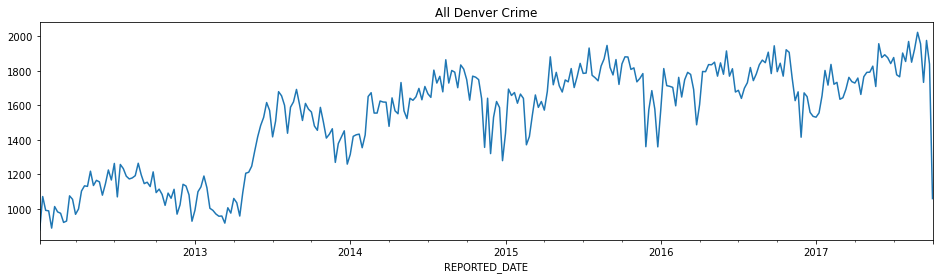

In [93]:
#간단히 그림을 그려봅시다.
#시간에 따라변화하는 데이텉이기때문에 그림을 보면 어떤 추세로 볼 수 있습니다.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 4))
weekly_crimes.plot(title='All Denver Crime', ax=ax)


In [94]:
#crime 데이터는 교통사고와 범죄로 구분됩니다. 이를 나눠서 집계해보죠.
crime = (
 pd.read_hdf('data/crime.h5', 'crime')
 .set_index('REPORTED_DATE')
 .sort_index()
)

In [95]:
(
 crime
 .resample('Q')#Q는 분기를 의미합니다. 3개월씩나누죠.
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)


,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
2013-06-30,12259,4510
2013-09-30,15799,4942
2013-12-31,13910,4968
2014-03-31,14487,5021


In [96]:
(
 crime
 .resample('QS') #QS는 분기의 시작일입니다. 날짜변화를 보세요
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)
#Q는 분기의 끝입니다.

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442
2013-04-01,12259,4510
2013-07-01,15799,4942
2013-10-01,13910,4968
2014-01-01,14487,5021


<AxesSubplot:title={'center':'Denver Crimes and Traffic Accidents'}, xlabel='REPORTED_DATE'>

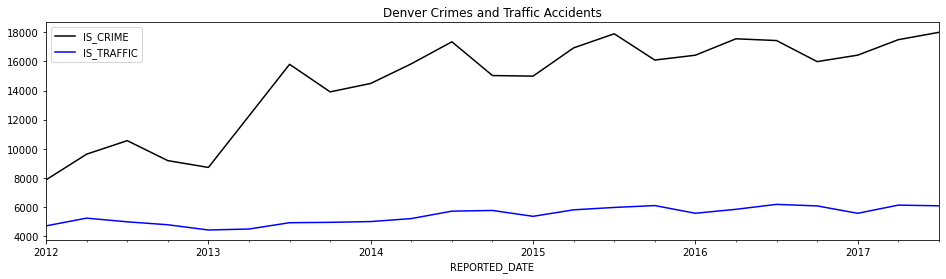

In [97]:
#이를 시각화해봅시다.
fig, ax = plt.subplots(figsize=(16, 4))
(
 crime
 .resample('Q') #QS는 분기의 시작일입니다. 날짜변화를 보세요
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .plot(color=['black', 'blue'], ax=ax, title='Denver Crimes and Traffic Accidents')
)
#크라임은 시간이 지날수록 증가하는 군요.

In [98]:
(
 crime
 .resample('Q')
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 #.iloc[0]
)
#첫주 

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
2013-06-30,12259,4510
2013-09-30,15799,4942
2013-12-31,13910,4968
2014-03-31,14487,5021


<AxesSubplot:xlabel='REPORTED_DATE'>

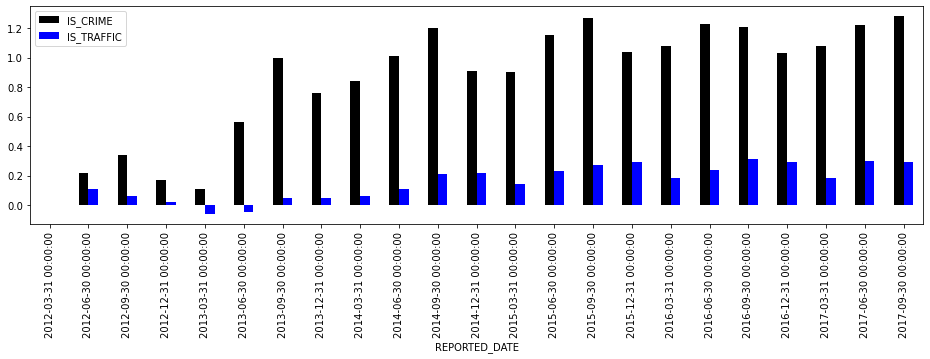

In [99]:
#첫 주를 기준으로 증감비율을 나타내봅시다.
crime_begin = (
 crime
 .resample('Q')
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .iloc[0]
)
fig, ax = plt.subplots(figsize=(16, 4))
(
 crime
 .resample('Q')
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .div(crime_begin)
 .sub(1)
 .round(2)#반올림
 .plot.bar(color=['black', 'blue'], ax=ax)
)

# 5. dt 속성들

모든 Timestamp들은 dt 속성을 갖고 있으며 이는 매우 유용합니다. 어떤 속성이 있는지는 아래의 예를 통해 알아보겠습니다.

In [100]:

crime = pd.read_hdf('data/crime.h5', 'crime')
(
 crime['REPORTED_DATE']
 .dt.day_name()
 .value_counts()
)


Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

<AxesSubplot:>

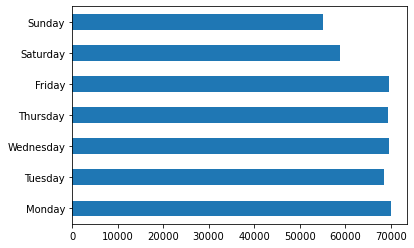

In [101]:
#위의 결과를 그래프로 그려봅시다.
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(figsize=(6, 4))
(
 crime['REPORTED_DATE']
 .dt.day_name()
 .value_counts()
 .reindex(days)
 .plot.barh(ax=ax)
)
#day를 새로 인덱스해서 만들어줍니다.

<AxesSubplot:>

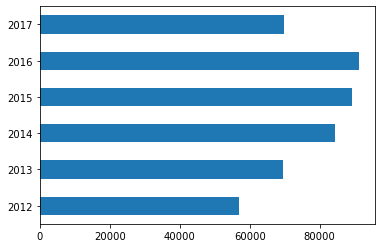

In [102]:
#연도별 그래프도 비슷하게 할 수 있죠
fig, ax = plt.subplots(figsize=(6, 4))
(
 crime['REPORTED_DATE']
 .dt.year #이 부분!
 .value_counts()
 .sort_index()
 .plot.barh(ax=ax)
)

In [103]:
# 만약 년도와 요일을 모두 활용하고 싶을 땐 groupby 를 할 수 있습니다.
(
 crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
 crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack()
)
#사이즈가 몇개나 있나.

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [104]:
#그런데 2017년의 경우 모든 날이 들어있지 않습니다.
crime.REPORTED_DATE.max()
#17년의 마지막날짜가 9월29일이다. 10 11 12가 없는데이터이다. 그래서 
#다른 년도보다 데이터가 적으니 숫자가 적다.
#이것을 어떻게 보정해줄까?
#그래서 12/9로 단순히 배로 해줄까?

Timestamp('2017-09-29 06:16:00')

In [105]:

#다른 해엔 9/29 전에 얼만큼의 범죄가 일어났는지 확인해봅시다.
# 그 비율을 2017년에 곱하기 위해서 말이죠.
crime_pct = (
 crime['REPORTED_DATE']
 .dt.dayofyear.le(272)
 .groupby(crime.REPORTED_DATE.dt.year)
 .mean()
 .mul(100)
 .round(2)
)


In [106]:
crime_pct

REPORTED_DATE
2012     74.84
2013     72.54
2014     75.06
2015     74.81
2016     75.15
2017    100.00
Name: REPORTED_DATE, dtype: float64

In [107]:

crime_pct.loc[2012:2016].median()


74.84

In [108]:
def update_2017(df_):
 df_.loc[2017] = (df_
 .loc[2017]
 .div(.748)
 .astype('int')
 )
 return df_
(
 crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
 crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
 .pipe(update_2017)#pipe를 보면 2017년 데이터를 가져온다음에 748로 나누어준다. 12개월이 된다면 어떻게될까 보정해기 위해서이다. 
 .reindex(columns=days)
)


day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


<AxesSubplot:xlabel='day', ylabel='year'>

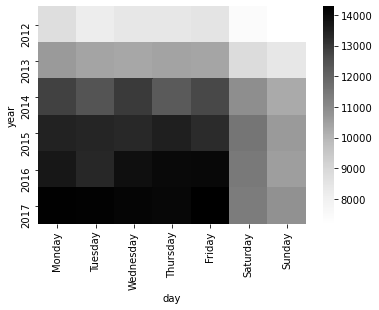

In [109]:
#시각화해봅시다.
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 4))
table = (
 crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
 crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
 .pipe(update_2017)
 .reindex(columns=days)
)
sns.heatmap(table, cmap='Greys', ax=ax)
#2017년이 가장 짙은걸보아 범죄가 많군요.
#보통 주중에 일어나고 주말엔 덜 일어난다.

In [110]:
#범죄가 증가하는 것처럼 보이지만, 인구 변동을 반영하지 않았습니다.
#인구를 확인해봅시다.
denver_pop = pd.read_csv('data/denver_pop.csv', index_col='Year')
denver_pop


,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [111]:
den_100k = denver_pop.div(100_000).squeeze()
den_100k
#아까 표였다면 시리즈로 잘 정리가 됐다.

Year
2017    7.05
2016    6.93
2015    6.80
2014    6.62
2013    6.47
2012    6.34
Name: Population, dtype: float64

<AxesSubplot:xlabel='day'>

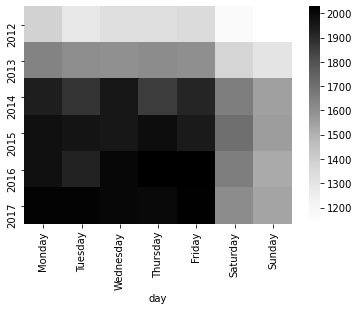

In [112]:
den_100k = denver_pop.div(100_000).squeeze() #시리즈로 변환
fig, ax = plt.subplots(figsize=(6, 4))
table = (
 crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
 crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
 .pipe(update_2017)
 .reindex(columns=days)
 .div(den_100k, axis=0)
 .astype(int)
)
sns.heatmap(table, cmap='Greys', ax=ax)
#인구를 고려한 범죄입니다. 10만명당 ! 위의 그림과
#눈으로 봤을때는 큰 차이가 없네요.

# 7. lambda 함수를 이용한 그룹화

조금 더 복잡한 그룹화를 수행해 봅시다.

In [113]:
crime = (pd.read_hdf('data/crime.h5', 'crime')
 .set_index("REPORTED_DATE")
 .sort_index())
#groupby 에는 lambda 함수를 비롯한 다양한 함수를 넘길 수 있습니다.
(
 crime.groupby(lambda idx: idx.day_name())
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)
#보통 한줄짜리로 만드는것을 람다함수라고 하죠.

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [114]:
#조금 복잡하게는 다음과 같이 할 수도 있지요.
func = [lambda idx: idx.round('2h').hour, lambda idx:idx.year]
(
 crime.groupby(func)
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .unstack()
 .style.highlight_max(color='lightgrey')
)
#어느시간대에 가장많이 발생했는지 진하게 됩니다.

<AxesSubplot:xlabel='None-None'>

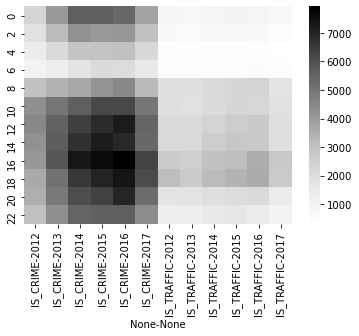

In [119]:
#다시한번 그림으로 그리면 히트맵으로 할 수 있습니다.
func = [lambda idx: idx.round('2h').hour, lambda idx:idx.year]
table = (
 crime.groupby(func)
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .unstack()
 #.style.highlight_max(color='lightgrey')
    #스타일이있으면 그림에 방해가 됩니다.
)
sns.heatmap(table, cmap='Greys')

#ax나 fig를 설정안해도 바로 그림을 그리고싶으면 seaborn에서 볼 수 있다.
#진할수록 범죄가 많이 일어남을 알 수 있습니다.